In [2]:
import numpy as np
from sklearn.datasets import load_diabetes
# Lasso with AIC/BIC cross validation

In [14]:
load_diabetes().keys()

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])

In [12]:
load_diabetes().feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [10]:
load_diabetes().data.shape, load_diabetes().target.shape

((442, 10), (442,))

In [30]:
X, y = load_diabetes().data, load_diabetes().target
X, y

(array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990749, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06833155, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286131, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04688253,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452873, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00422151,  0.00306441]]),
 array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
   

In [68]:
X, y = load_diabetes(return_X_y=True, as_frame=True)
X.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


In [64]:
y.head()

0    151.0
1     75.0
2    141.0
3    206.0
4    135.0
Name: target, dtype: float64

In [44]:
from sklearn.linear_model import LassoLarsIC 
from sklearn.pipeline import make_pipeline # used for preprocessing
from sklearn.preprocessing import StandardScaler
import time
# provides a Lasso estimator that uses the Akaike information criterion (AIC) or the Bayes information criterion (BIC) to select the optimal value of the regularization parameter alpha.
# better way then using cross validation with logspace to find the best alpha

In [42]:
start_time = time.time()
lasso_lars_ic = make_pipeline(StandardScaler(), LassoLarsIC(criterion="aic")).fit(X, y)
fit_time = time.time() - start_time
lasso_lars_ic

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('lassolarsic', LassoLarsIC())])

In [59]:
lasso_lars_ic[-1].alpha_, lasso_lars_ic[-1].alphas_, lasso_lars_ic[-1].alphas_[7]

(0.9504071158262887,
 array([45.16003002, 42.30034308, 21.54205167, 15.0340775 ,  6.18963088,
         4.22303846,  3.28032055,  0.95040712,  0.26053984,  0.24202272,
         0.10379985,  0.06233134,  0.        ]),
 0.9504071158262887)

In [69]:
lasso_lars_ic[-1].coef_ # for every feature

array([  0.        ,  -9.40617319,  24.84185238,  14.13417151,
        -4.9441846 ,   0.        , -10.65098298,   0.        ,
        24.48406565,   2.60509591])

In [70]:
lasso_lars_ic[-1].intercept_

152.13348416289594

In [71]:
# The value of the information criteria (‘aic’, ‘bic’) across all alphas. The alpha which has the smallest information criterion is chosen
# per https://arxiv.org/abs/0712.0881
lasso_lars_ic[-1].criterion_

array([5234.84931215, 5199.15401532, 4924.92276245, 4867.86511238,
       4814.81984599, 4802.63051544, 4799.45166924, 4790.00236709,
       4790.25605061, 4791.96773482, 4790.46388823, 4790.39167332,
       4792.1249163 ])

In [74]:
import pandas as pd
results = pd.DataFrame(
    {
        "alphas": lasso_lars_ic[-1].alphas_,
        "AIC criterion": lasso_lars_ic[-1].criterion_,
    }
)
results

,alphas,AIC criterion
0,45.160030,5234.849312
1,42.300343,5199.154015
2,21.542052,4924.922762
3,15.034077,4867.865112
4,6.189631,4814.819846
5,4.223038,4802.630515
6,3.280321,4799.451669
7,0.950407,4790.002367
8,0.260540,4790.256051
9,0.242023,4791.967735


In [80]:
results.set_index("alphas")
alpha_aic = lasso_lars_ic[-1].alpha_
alpha_aic # best alpha


0.9504071158262887

In [82]:
# now using BIC criterion
lasso_lars_ic.set_params(lassolarsic__criterion="bic").fit(X, y)
results["BIC criterion"] = lasso_lars_ic[-1].criterion_
alpha_bic = lasso_lars_ic[-1].alpha_
alpha_bic

0.9504071158262887

In [102]:
def highlight_min(x):
    x_min = x.min()
    x_max = x.max()
    ret = []
    for v in x:
        if v == x_min:
            ret += ["color: green"]
        elif v == x_max:
            ret += ["color: red"]
        else:
            ret += [""]
    return ret

# results = results.set_index("alphas")
results.style.apply(highlight_min)

,AIC criterion,BIC criterion
alphas,,
45.160030,5234.849312,5234.849312
42.300343,5199.154015,5203.245325
21.542052,4924.922762,4933.105382
15.034077,4867.865112,4880.139042
6.189631,4814.819846,4831.185086
4.223038,4802.630515,4823.087065
3.280321,4799.451669,4823.999529
0.950407,4790.002367,4818.641536
0.260540,4790.256051,4822.986530


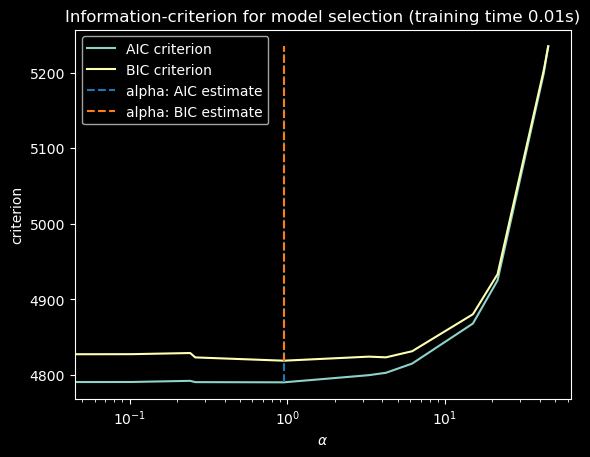

In [107]:
# matplotlib.pyplot.vlines(x, ymin, ymax, colors='k', linestyles='solid', label='', *, data=None, **kwargs)[source]
ax = results.plot()
ax.vlines(
    alpha_aic,
    results["AIC criterion"].min(),
    results["AIC criterion"].max(),
    label="alpha: AIC estimate",
    linestyles="--",
    color="tab:blue",
)
ax.vlines(
    alpha_bic,
    results["BIC criterion"].min(),
    results["BIC criterion"].max(),
    label="alpha: BIC estimate",
    linestyle="--",
    color="tab:orange",
)
ax.set_xlabel(r"$\alpha$")
ax.set_ylabel("criterion")
ax.set_xscale("log")
ax.legend()
_ = ax.set_title(
    f"Information-criterion for model selection (training time {fit_time:.2f}s)"
)

In [106]:
results["BIC criterion"].min(), results["BIC criterion"].max(), results["AIC criterion"].min(), results["AIC criterion"].max()

(4818.641536266902, 5234.849312151957, 4790.002367092358, 5234.849312151957)

In [113]:
# lets try cross validation now
from sklearn.linear_model import LassoCV
from sklearn.model_selection import cross_val_score

start_time = time.time()
model = make_pipeline(StandardScaler(), LassoCV(cv=5)).fit(X,y)
fit_time = time.time() - start_time
fit_time

0.0256192684173584

In [115]:
model[-1].coef_, model[-1].intercept_, model[-1].alpha_

(array([ -0.30892106, -11.22504613,  24.81684888,  15.27130382,
        -27.08540992,  14.38623131,  -0.        ,   6.83504132,
         31.86497214,   3.17904105]),
 152.13348416289594,
 0.07891843500595848)

In [116]:
X.head(), y.head()

(        age       sex       bmi        bp        s1        s2        s3  \
 0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
 1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
 2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
 3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
 4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   
 
          s4        s5        s6  
 0 -0.002592  0.019907 -0.017646  
 1 -0.039493 -0.068332 -0.092204  
 2 -0.002592  0.002861 -0.025930  
 3  0.034309  0.022688 -0.009362  
 4 -0.002592 -0.031988 -0.046641  ,
 0    151.0
 1     75.0
 2    141.0
 3    206.0
 4    135.0
 Name: target, dtype: float64)

In [128]:
model[-1].mse_path_.shape

(100, 5)

In [131]:
model[-1].mse_path_.mean(axis=0).shape

(5,)